In [1]:
"""
优化参数使用
"""
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting

from research_strategies.breaker.r_break_strategy_5 import RBreakStrategy
# from research_strategies.turtle.turtle_strategy_3 import TurtleStrategy

2020-01-20 22:45:03.973133	开始加载历史数据
2020-01-20 22:45:03.997039	历史数据加载完成，数据量：270705
2020-01-20 22:45:04.293362	策略初始化完成
2020-01-20 22:45:04.293362	开始回放历史数据
2020-01-20 22:45:19.388110	历史数据回放结束
2020-01-20 22:45:19.388110	开始计算逐日盯市盈亏
2020-01-20 22:45:19.401704	逐日盯市盈亏计算完成
2020-01-20 22:45:19.401704	开始计算策略统计指标
2020-01-20 22:45:19.414644	------------------------------
2020-01-20 22:45:19.415645	首个交易日：	2017-03-07
2020-01-20 22:45:19.415645	最后交易日：	2019-12-31
2020-01-20 22:45:19.415645	总交易日：	691
2020-01-20 22:45:19.415645	盈利交易日：	169
2020-01-20 22:45:19.415645	亏损交易日：	183
2020-01-20 22:45:19.415645	起始资金：	1,000,000.00
2020-01-20 22:45:19.415645	结束资金：	1,787,108.63
2020-01-20 22:45:19.415645	总收益率：	78.71%
2020-01-20 22:45:19.415645	年化收益：	27.34%
2020-01-20 22:45:19.415645	最大回撤: 	-103,731.81
2020-01-20 22:45:19.415645	百分比最大回撤: -9.98%
2020-01-20 22:45:19.415645	最长回撤天数: 	92
2020-01-20 22:45:19.415645	总盈亏：	787,108.63
2020-01-20 22:45:19.415645	总手续费：	59,453.82
2020-01-20 22:45:19.415645	总滑点：	71,200.00
2020-01

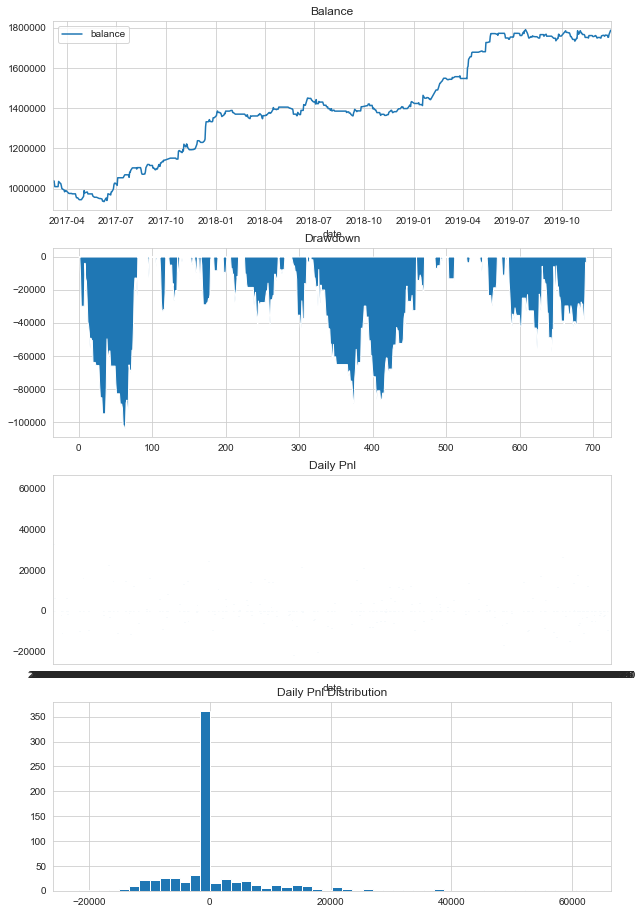

In [4]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="SR99.CZCE",
    interval="1m",
    start=datetime(2017, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.3/10000,  # 保证金比例
    slippage=0.2,  # 滑点
    size=10,  # 合约乘数
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(RBreakStrategy, {
    'break_rate': 0.5,
    'stop_rate': 0.4,
    'tend_length': 18,
    'fixed_size': 50
})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [3]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("break_rate", 0.4, 0.6, 0.1)
setting.add_parameter("stop_rate", 0.4, 0.6, 0.1)
setting.add_parameter("tend_length", 10, 30, 2)

engine.run_ga_optimization(setting)

2020-01-20 21:56:07.337171	参数优化空间：99
2020-01-20 21:56:07.337171	每代族群总数：100
2020-01-20 21:56:07.338165	优良筛选个数：80
2020-01-20 21:56:07.338165	迭代次数：30
2020-01-20 21:56:07.338165	交叉概率：95%
2020-01-20 21:56:07.338165	突变概率：5%
2020-01-20 21:56:07.338165	开始加载历史数据
2020-01-20 21:56:07.358146	历史数据加载完成，数据量：270705
2020-01-20 21:56:07.658343	策略初始化完成
2020-01-20 21:56:07.659334	开始回放历史数据
2020-01-20 21:56:23.256680	历史数据回放结束
2020-01-20 21:56:23.257688	开始计算逐日盯市盈亏
2020-01-20 21:56:23.271162	逐日盯市盈亏计算完成
2020-01-20 21:56:23.271609	开始计算策略统计指标
2020-01-20 21:56:23.285572	开始加载历史数据
2020-01-20 21:56:23.299213	历史数据加载完成，数据量：270705
2020-01-20 21:56:23.555987	策略初始化完成
2020-01-20 21:56:23.555987	开始回放历史数据
2020-01-20 21:56:38.632939	历史数据回放结束
2020-01-20 21:56:38.632939	开始计算逐日盯市盈亏
2020-01-20 21:56:38.646901	逐日盯市盈亏计算完成
2020-01-20 21:56:38.646901	开始计算策略统计指标
2020-01-20 21:56:38.661862	开始加载历史数据
2020-01-20 21:56:38.675823	历史数据加载完成，数据量：270705
2020-01-20 21:56:39.011966	策略初始化完成
2020-01-20 21:56:39.011966	开始回放历史数据
2020-01-20 21:56:54.

2020-01-20 22:03:03.113289	策略初始化完成
2020-01-20 22:03:03.114287	开始回放历史数据
2020-01-20 22:03:18.917166	历史数据回放结束
2020-01-20 22:03:18.917166	开始计算逐日盯市盈亏
2020-01-20 22:03:18.930091	逐日盯市盈亏计算完成
2020-01-20 22:03:18.931087	开始计算策略统计指标
2020-01-20 22:03:18.951035	开始加载历史数据
2020-01-20 22:03:18.966992	历史数据加载完成，数据量：270705
2020-01-20 22:03:19.325037	策略初始化完成
2020-01-20 22:03:19.326035	开始回放历史数据
2020-01-20 22:03:35.737453	历史数据回放结束
2020-01-20 22:03:35.738444	开始计算逐日盯市盈亏
2020-01-20 22:03:35.751417	逐日盯市盈亏计算完成
2020-01-20 22:03:35.751417	开始计算策略统计指标
2020-01-20 22:03:35.767331	开始加载历史数据
2020-01-20 22:03:35.780324	历史数据加载完成，数据量：270705
2020-01-20 22:03:36.119429	策略初始化完成
2020-01-20 22:03:36.119429	开始回放历史数据
2020-01-20 22:03:52.292135	历史数据回放结束
2020-01-20 22:03:52.292135	开始计算逐日盯市盈亏
2020-01-20 22:03:52.307121	逐日盯市盈亏计算完成
2020-01-20 22:03:52.307121	开始计算策略统计指标
2020-01-20 22:03:52.322045	开始加载历史数据
2020-01-20 22:03:52.336003	历史数据加载完成，数据量：270705
2020-01-20 22:03:52.627728	策略初始化完成
2020-01-20 22:03:52.628726	开始回放历史数据
2020-01-20 22:04:

2020-01-20 22:10:25.574374	策略初始化完成
2020-01-20 22:10:25.574374	开始回放历史数据
2020-01-20 22:10:41.668720	历史数据回放结束
2020-01-20 22:10:41.668720	开始计算逐日盯市盈亏
2020-01-20 22:10:41.683676	逐日盯市盈亏计算完成
2020-01-20 22:10:41.683676	开始计算策略统计指标
2020-01-20 22:10:41.698635	开始加载历史数据
2020-01-20 22:10:41.717585	历史数据加载完成，数据量：270705
2020-01-20 22:10:42.039726	策略初始化完成
2020-01-20 22:10:42.039726	开始回放历史数据
2020-01-20 22:10:57.786980	历史数据回放结束
2020-01-20 22:10:57.786980	开始计算逐日盯市盈亏
2020-01-20 22:10:57.801934	逐日盯市盈亏计算完成
2020-01-20 22:10:57.802932	开始计算策略统计指标
2020-01-20 22:10:57.816895	开始加载历史数据
2020-01-20 22:10:57.830857	历史数据加载完成，数据量：270705
2020-01-20 22:10:58.165005	策略初始化完成
2020-01-20 22:10:58.165005	开始回放历史数据
2020-01-20 22:11:13.975877	历史数据回放结束
2020-01-20 22:11:13.975877	开始计算逐日盯市盈亏
2020-01-20 22:11:13.989836	逐日盯市盈亏计算完成
2020-01-20 22:11:13.990832	开始计算策略统计指标
2020-01-20 22:11:14.005793	开始加载历史数据
2020-01-20 22:11:14.019755	历史数据加载完成，数据量：270705
2020-01-20 22:11:14.296809	策略初始化完成
2020-01-20 22:11:14.296809	开始回放历史数据
2020-01-20 22:11:

2020-01-20 22:17:23.331198	策略初始化完成
2020-01-20 22:17:23.332193	开始回放历史数据
2020-01-20 22:17:38.740238	历史数据回放结束
2020-01-20 22:17:38.740238	开始计算逐日盯市盈亏
2020-01-20 22:17:38.752999	逐日盯市盈亏计算完成
2020-01-20 22:17:38.753150	开始计算策略统计指标
2020-01-20 22:17:38.766112	开始加载历史数据
2020-01-20 22:17:38.780104	历史数据加载完成，数据量：270705
2020-01-20 22:17:39.036389	策略初始化完成
2020-01-20 22:17:39.036389	开始回放历史数据
2020-01-20 22:17:54.107247	历史数据回放结束
2020-01-20 22:17:54.108243	开始计算逐日盯市盈亏
2020-01-20 22:17:54.114226	逐日盯市盈亏计算完成
2020-01-20 22:17:54.114226	开始计算策略统计指标
2020-01-20 22:17:54.122262	开始加载历史数据
2020-01-20 22:17:54.137164	历史数据加载完成，数据量：270705
2020-01-20 22:17:54.443126	策略初始化完成
2020-01-20 22:17:54.444122	开始回放历史数据
2020-01-20 22:18:06.624628	历史数据回放结束
2020-01-20 22:18:06.625623	开始计算逐日盯市盈亏
2020-01-20 22:18:06.638585	逐日盯市盈亏计算完成
2020-01-20 22:18:06.638585	开始计算策略统计指标
2020-01-20 22:18:06.651550	开始加载历史数据
2020-01-20 22:18:06.662520	历史数据加载完成，数据量：270705
2020-01-20 22:18:06.924257	策略初始化完成
2020-01-20 22:18:06.924257	开始回放历史数据
2020-01-20 22:18:

[({'break_rate': 0.5, 'stop_rate': 0.4, 'tend_length': 18},
  1.9054777718233369,
  {})]